# Atelier 2   «Classification»

## Objective : 
l’objective principal de cet atelier est de pratiquer les concepts de la classification,  en traitant les
données d’une Data Sets, ainsi d’évaluer les algorithmes pour construire le  modèle adéquat à notre
problématique. 

## Partie 1 (Data Visualisation et Feature Selection et Normalisation):

### 1. En utilisant pandas essayer d’explorer les données du Data set.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


column_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigree",
    "Age",
    "Outcome"
]

df = pd.read_csv(r'C:\Users\imk\Desktop\LSI\Maching learning\data sets\pima-indians-diabetes.csv', header=None, names=column_names)


print("Aperçu des premières lignes :")
display(df.head())

print("\nDimensions du dataset :", df.shape)
print("\nTypes des colonnes :")
print(df.dtypes)


print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


duplicates = df.duplicated().sum()
print(f"\nNombre de doublons détectés : {duplicates}")

Aperçu des premières lignes :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dimensions du dataset : (768, 9)

Types des colonnes :
Pregnancies           int64
Glucose               int64
BloodPressure         int64
SkinThickness         int64
Insulin               int64
BMI                 float64
DiabetesPedigree    float64
Age                   int64
Outcome               int64
dtype: object

Valeurs manquantes par colonne :
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

Nombre de doublons détectés : 0


### 2. Afficher le résumer statistique du Data Sets avec une interprétation des résultats obtenues.

In [7]:
print("\nRésumé statistique :")
display(df.describe())

# Détection des valeurs anormales (zéros impossibles)
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("\nValeurs invalides (0) dans les colonnes physiques :")
for col in cols_with_zero_invalid:
    nb_zero = (df[col] == 0).sum()
    print(f"{col} : {nb_zero} valeurs = 0")


Résumé statistique :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Valeurs invalides (0) dans les colonnes physiques :
Glucose : 5 valeurs = 0
BloodPressure : 35 valeurs = 0
SkinThickness : 227 valeurs = 0
Insulin : 374 valeurs = 0
BMI : 11 valeurs = 0


In [8]:
# Colonnes où la valeur 0 est invalide
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_invalid:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

df[cols_with_zero_invalid].isin([0]).sum()


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

### 3. Afficher les nuages des points du  data set  selon les propriétés « Features » en utilisant matplotlib et pandas « scatter_matrix ».

<Figure size 1200x1200 with 0 Axes>

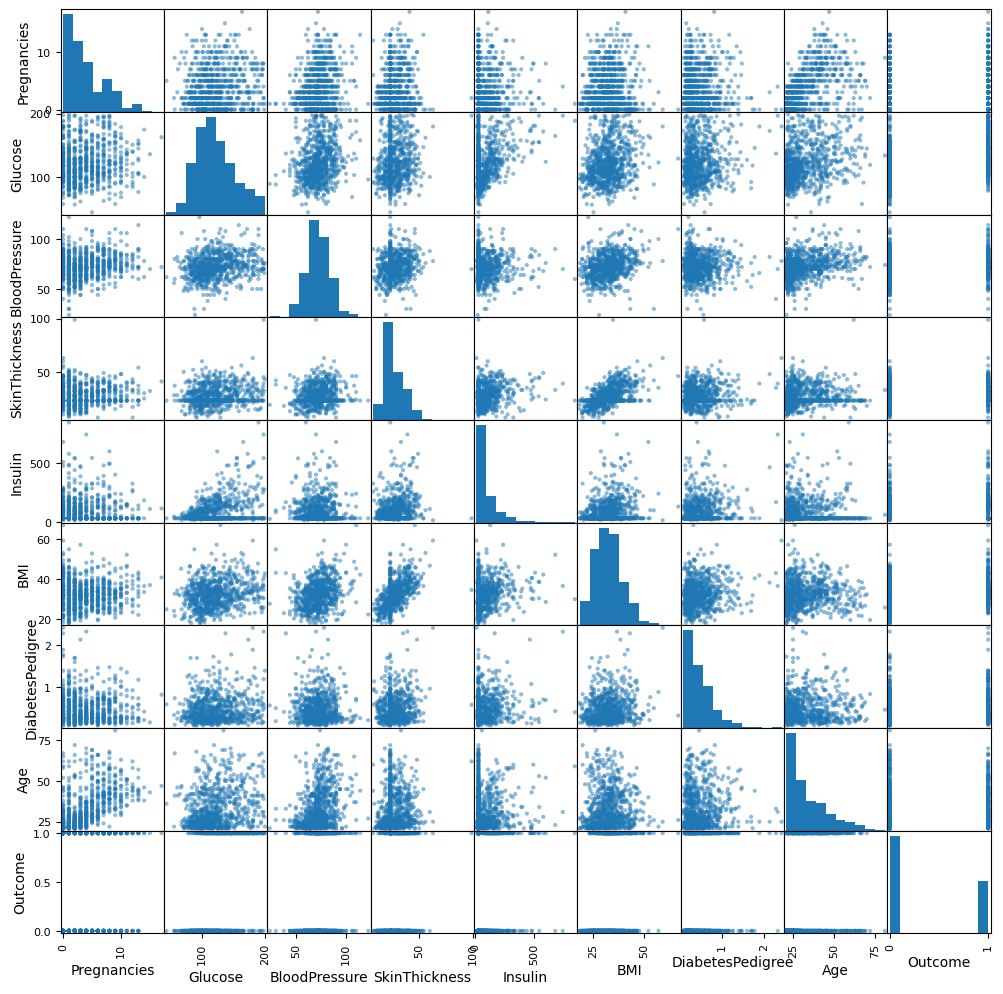

In [9]:
plt.figure(figsize=(12, 12))
scatter_matrix(df, figsize=(12, 12), diagonal='hist')
plt.show()

### 4. Appliquer les 4 méthodes de Features selection « Univariate Selection, PCA, Recursive Feature Elimination et Feature Importance ».

In [10]:
# Séparation features / target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

#### Méthode 1 : Univariate Selection (SelectKBest + chi2)

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

# On garde les 5 meilleures features
selector = SelectKBest(score_func=chi2, k=5)
fit = selector.fit(X, y)

# Scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': fit.scores_
})

print("\n--- Univariate Selection (Chi2) ---")
display(scores.sort_values(by="Score", ascending=False))



--- Univariate Selection (Chi2) ---


,Feature,Score
4,Insulin,1989.589394
1,Glucose,1418.442397
7,Age,181.303689
0,Pregnancies,111.519691
5,BMI,108.933725
3,SkinThickness,85.431282
2,BloodPressure,42.582507
6,DiabetesPedigree,5.392682


#### Méthode 2 : PCA (Analyse en Composantes Principales)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA avec 2 principales composantes
pca = PCA(n_components=2)
pca_fit = pca.fit(X_scaled)

print("\n--- Variance expliquée par PCA ---")
print(pca.explained_variance_ratio_)



--- Variance expliquée par PCA ---
[0.27429654 0.20541242]


#### Méthode 3 : RFE (Recursive Feature Elimination)

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print("\n--- RFE Ranking ---")
for feature, ranking in zip(X.columns, rfe.ranking_):
    print(f"{feature} : Rank = {ranking}")



--- RFE Ranking ---
Pregnancies : Rank = 1
Glucose : Rank = 1
BloodPressure : Rank = 2
SkinThickness : Rank = 4
Insulin : Rank = 3
BMI : Rank = 1
DiabetesPedigree : Rank = 1
Age : Rank = 1


### 5. Normaliser les données des attributs qui nécessitent une normalisation. 

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Créer l’objet scaler
scaler = MinMaxScaler()

# Appliquer la normalisation sur toutes les features
X_normalized = scaler.fit_transform(X)

X_norm_df = pd.DataFrame(X_normalized, columns=X.columns)
display(X_norm_df.head())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


## Partie 2 (Classification choix de algorithme adéquat ):

### 1. En utilisant l’API sklearn entraîner les modèles en utilisant ces algorithmes « KNN, Decision Tree, ANN, Naive Bayes, SVM  selon les kernels suivants : Linear, polynomial  et guassain».

In [15]:
from sklearn.model_selection import train_test_split

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (614, 8), Test shape: (154, 8)


In [16]:
# a) KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # 5 voisins par défaut
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# b) Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# c) ANN (Artificial Neural Network, MLPClassifier)
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=500, random_state=42)
ann.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

In [19]:
#d) Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [20]:
#SVM (avec différents kernels)
from sklearn.svm import SVC

# Linear
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)

# Polynomial
svm_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svm_poly.fit(X_train, y_train)

# RBF (Gaussian)
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

### 2. Sauvegarder les 5 modèles

In [21]:
# On peut utiliser joblib pour sauvegarder chaque modèle.
import joblib 

# Sauvegarde des modèles
joblib.dump(knn, "knn_model.pkl")
joblib.dump(dt, "decision_tree_model.pkl")
joblib.dump(ann, "ann_model.pkl")
joblib.dump(nb, "naive_bayes_model.pkl")
joblib.dump(svm_linear, "svm_linear_model.pkl")
joblib.dump(svm_poly, "svm_poly_model.pkl")
joblib.dump(svm_rbf, "svm_rbf_model.pkl")

['svm_rbf_model.pkl']

### 3.   Évaluer les modèles en utilisant ces  métriques:
*Classification Accuracy.* 
*Logarithmic Loss.* 
*Area Under ROC Curve.*  
*Confusion Matrix.* 
*Classification Report.*
*Interpréter le résultat de l’évaluation.*

#### 1. Préparer les prédictions

In [22]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, classification_report

# Liste des modèles
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "ANN": ann,
    "Naive Bayes": nb,
    "SVM Linear": svm_linear,
    "SVM Poly": svm_poly,
    "SVM RBF": svm_rbf
}

# Dictionnaire pour stocker les résultats
results = {}

####  2. Calculer toutes les métriques pour chaque modèle

In [23]:
for name, model in models.items():
    # Prédictions des classes
    y_pred = model.predict(X_test)
    # Probabilités nécessaires pour Log Loss et ROC AUC
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1
    
    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    ll = log_loss(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    
    # Stockage
    results[name] = {
        "Accuracy": acc,
        "LogLoss": ll,
        "ROC_AUC": auc,
        "ConfusionMatrix": cm,
        "ClassificationReport": cr
    }

#### 3. Afficher les résultats de manière lisible

In [24]:
for name, metrics in results.items():
    print(f"\n=== {name} ===")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Log Loss: {metrics['LogLoss']:.4f}")
    print(f"ROC AUC: {metrics['ROC_AUC']:.4f}")
    print("Confusion Matrix:")
    print(metrics["ConfusionMatrix"])
    print("Classification Report:")
    print(pd.DataFrame(metrics["ClassificationReport"]).transpose())



=== KNN ===
Accuracy: 0.7208
Log Loss: 2.2615
ROC AUC: 0.7700
Confusion Matrix:
[[82 18]
 [25 29]]
Classification Report:
              precision    recall  f1-score     support
0              0.766355  0.820000  0.792271  100.000000
1              0.617021  0.537037  0.574257   54.000000
accuracy       0.720779  0.720779  0.720779    0.720779
macro avg      0.691688  0.678519  0.683264  154.000000
weighted avg   0.713991  0.720779  0.715824  154.000000

=== Decision Tree ===
Accuracy: 0.6688
Log Loss: 11.9365
ROC AUC: 0.6172
Confusion Matrix:
[[79 21]
 [30 24]]
Classification Report:
              precision    recall  f1-score     support
0              0.724771  0.790000  0.755981  100.000000
1              0.533333  0.444444  0.484848   54.000000
accuracy       0.668831  0.668831  0.668831    0.668831
macro avg      0.629052  0.617222  0.620415  154.000000
weighted avg   0.657643  0.668831  0.660908  154.000000

=== ANN ===
Accuracy: 0.7208
Log Loss: 0.5077
ROC AUC: 0.8170
Confusio

### 4. Comparer la performance des 8 algorithmes en utilisant la technique Spot-checking. 

#### Interprétation métrique par métrique
##### 🔹 Accuracy

Meilleure : SVM Poly (0.753) → 75% des prédictions correctes

Moins bonne : Decision Tree (0.669)

Remarque : Accuracy peut masquer la difficulté à prédire les diabétiques (classe 1) car la classe 0 est majoritaire.

##### 🔹 Log Loss

Évalue la confiance du modèle dans ses prédictions probabilistes.

Très élevé : Decision Tree (11.9365) et KNN (2.2615) → mauvaises probabilités

Très bas : ANN (0.5077), SVM Linear (0.5123) → probabilités fiables

##### 🔹 ROC AUC

Mesure la capacité à distinguer les classes.

Meilleure : SVM Poly (0.8398) → excellente discrimination

Moins bonne : Decision Tree (0.6172) → modèle faible pour séparer les classes

##### 🔹 Confusion Matrix / Recall

Classe minoritaire = diabète (1)

Rappel (recall) sur 1 est faible pour beaucoup de modèles (0.48 à 0.54 pour ANN/SVM Linear)

SVM Poly a le meilleur recall = 0.518 → détecte un peu plus de diabétiques

##### 🔹 Precision / F1-score

F1 combine precision et recall

Classe 1 : meilleurs F1 → SVM Poly (0.596)

Classe 0 : meilleur F1 → SVM Poly (0.822)

SVM Poly équilibre le mieux la performance globale entre les deux classes.

####  Comparaison globale – Spot-checking

##### Top performers :

SVM Poly → meilleur accuracy et ROC AUC, bon F1-score sur les deux classes

SVM RBF / ANN / SVM Linear → performances correctes, légèrement moins bonnes que Poly

Moyenne :

KNN → accuracy correct, mais probabilités mauvaises

Naive Bayes → recall classe 1 correct mais moins bon ROC AUC

Faible : Decision Tree → mauvais ROC AUC, Log Loss catastrophique

#### Conclusion Spot-checking :
➤ Pour ce dataset, SVM Poly semble le meilleur modèle globalement.
➤ ANN et SVM Linear sont de bons candidats également.
➤ Decision Tree est trop simple et surajuste facilement.

### 5. Charger les 5 modèles puis Prédire les données du  data set de test, en utilisant les 8 modèles.

In [25]:
import joblib
#Charger les modèles sauvegardés
# Charger les modèles
knn = joblib.load("knn_model.pkl")
dt = joblib.load("decision_tree_model.pkl")
ann = joblib.load("ann_model.pkl")
nb = joblib.load("naive_bayes_model.pkl")
svm_linear = joblib.load("svm_linear_model.pkl")
svm_poly = joblib.load("svm_poly_model.pkl")
svm_rbf = joblib.load("svm_rbf_model.pkl")

# Stocker dans un dictionnaire pour faciliter les prédictions
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "ANN": ann,
    "Naive Bayes": nb,
    "SVM Linear": svm_linear,
    "SVM Poly": svm_poly,
    "SVM RBF": svm_rbf
}

print("✔ Tous les modèles ont été chargés avec succès.")


✔ Tous les modèles ont été chargés avec succès.


In [26]:
#2. Prédire les données de test
# Dictionnaire pour stocker les prédictions
predictions = {}

for name, model in models.items():
    y_pred = model.predict(X_test)           # Prédictions des classes
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilité pour classe 1 si disponible
    predictions[name] = {"y_pred": y_pred, "y_prob": y_prob}

print("✔ Prédictions terminées pour tous les modèles.")


✔ Prédictions terminées pour tous les modèles.


In [27]:
#3. Vérification rapide des prédictions
# Exemple : afficher les 10 premières prédictions pour chaque modèle
for name, pred in predictions.items():
    print(f"\n=== {name} ===")
    print("y_pred:", pred["y_pred"][:10])
    if pred["y_prob"] is not None:
        print("y_prob:", pred["y_prob"][:10])


=== KNN ===
y_pred: [1 0 0 1 0 0 0 1 0 1]
y_prob: [1.  0.  0.2 0.6 0.  0.2 0.  0.8 0.  0.6]

=== Decision Tree ===
y_pred: [1 0 0 1 0 0 0 1 0 1]
y_prob: [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]

=== ANN ===
y_pred: [1 0 0 0 0 0 0 1 0 1]
y_prob: [0.61560542 0.07641631 0.24897167 0.24785489 0.02081331 0.17398563
 0.43326917 0.83612888 0.05982281 0.81453665]

=== Naive Bayes ===
y_pred: [0 0 0 0 0 0 1 1 0 1]
y_prob: [0.43465026 0.38026273 0.22507639 0.07603198 0.00963643 0.05296342
 0.74458868 0.99284252 0.01002204 0.99099946]

=== SVM Linear ===
y_pred: [1 0 0 0 0 0 0 1 0 1]
y_prob: [0.63955785 0.09815197 0.30288791 0.27394426 0.03667208 0.17502796
 0.41863623 0.93936363 0.09776182 0.81262378]

=== SVM Poly ===
y_pred: [1 0 0 0 0 0 0 1 0 1]
y_prob: [0.55200598 0.10217972 0.25990371 0.3342662  0.17548732 0.24857097
 0.27870125 0.89128808 0.19608794 0.68008761]

=== SVM RBF ===
y_pred: [1 0 0 0 0 0 0 1 0 1]
y_prob: [0.7213994  0.14863479 0.22001191 0.37921208 0.12467278 0.20722364
 0.35179096 0.86

### 6. Appliquer cette fois les trois techniques d’ensemble learning « bagging , stacking et boosting »

#### bagging 

In [34]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
# Bagging
bagging = BaggingClassifier( estimator=DecisionTreeClassifier(),
                            n_estimators=50,
                            random_state=42 )
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

#### BOOSTING 

In [35]:
# Boosting
boosting = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)
boosting.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, random_state=42)

#### Stacking 

In [36]:
from sklearn.neural_network import MLPClassifier

# ANN pour stacking
ann = MLPClassifier(
    hidden_layer_sizes=(50,),  # une couche cachée de 50 neurones
    max_iter=1000,             # augmenter le nombre d'itérations
    solver='adam',
    random_state=42
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('knn', knn),
    ('dt', dt),
    ('ann', ann),  # ANN avec max_iter augmenté
    ('nb', nb),
    ('svm_poly', svm_poly)
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking.fit(X_train_scaled, y_train)
y_pred_stacking = stacking.predict(X_test_scaled)
y_prob_stacking = stacking.predict_proba(X_test_scaled)[:, 1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_m

### 7. Comparer les résultats obtenues des trois techniques avec les résultats de 8 algorithmes.

In [37]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, classification_report

ensemble_models = {
    "Bagging": bagging,
    "Boosting": boosting,
    "Stacking": stacking
}

results_ensemble = {}

for name, model in ensemble_models.items():
    if name == "Stacking":
        y_pred = y_pred_stacking
        y_prob = y_prob_stacking
    else:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    ll = log_loss(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)

    results_ensemble[name] = {
        "Accuracy": acc,
        "LogLoss": ll,
        "ROC_AUC": auc,
        "ConfusionMatrix": cm,
        "ClassificationReport": cr
    }

# Affichage
for name, metrics in results_ensemble.items():
    print(f"\n=== {name} ===")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Log Loss: {metrics['LogLoss']:.4f}")
    print(f"ROC AUC: {metrics['ROC_AUC']:.4f}")
    print("Confusion Matrix:")
    print(metrics["ConfusionMatrix"])
    print("Classification Report:")
    print(pd.DataFrame(metrics["ClassificationReport"]).transpose())



=== Bagging ===
Accuracy: 0.7403
Log Loss: 0.7188
ROC AUC: 0.8074
Confusion Matrix:
[[83 17]
 [23 31]]
Classification Report:
              precision    recall  f1-score    support
0              0.783019  0.830000  0.805825  100.00000
1              0.645833  0.574074  0.607843   54.00000
accuracy       0.740260  0.740260  0.740260    0.74026
macro avg      0.714426  0.702037  0.706834  154.00000
weighted avg   0.734915  0.740260  0.736403  154.00000

=== Boosting ===
Accuracy: 0.7403
Log Loss: 0.5442
ROC AUC: 0.8159
Confusion Matrix:
[[85 15]
 [25 29]]
Classification Report:
              precision    recall  f1-score    support
0              0.772727  0.850000  0.809524  100.00000
1              0.659091  0.537037  0.591837   54.00000
accuracy       0.740260  0.740260  0.740260    0.74026
macro avg      0.715909  0.693519  0.700680  154.00000
weighted avg   0.732881  0.740260  0.733192  154.00000

=== Stacking ===
Accuracy: 0.7143
Log Loss: 0.5368
ROC AUC: 0.7909
Confusion Matrix:

Comparaison Bagging, Boosting et Stacking

Dans cette étude, trois approches d’ensemble learning (Bagging, Boosting et Stacking) ont été appliquées et comparées aux huit algorithmes individuels. Les résultats montrent que :

Boosting (AdaBoost) obtient les meilleures performances globales :

AUC = 0.8159 (le plus élevé)

LogLoss = 0.5442 (faible, donc probabilités mieux calibrées)

Accuracy = 0.7403
Boosting corrige progressivement les erreurs des arbres faibles et s’adapte mieux à notre dataset.

Bagging présente une précision identique, mais un LogLoss et un AUC légèrement moins bons.
Bagging apporte surtout de la stabilité, mais pas la même finesse que Boosting.

Stacking combine plusieurs modèles hétérogènes mais n’a pas surpassé Boosting dans ce cas, probablement à cause de la taille limitée du dataset.
Il montre cependant un bon LogLoss, indiquant des probabilités cohérentes.

Ainsi, parmi les trois techniques, Boosting est la méthode la plus performante pour ce problème.